In [2]:
import pandas as pd
import numpy as np
import string
from scipy.stats import pearsonr
import re
from string import punctuation


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

import re
from string import punctuation


from collections import Counter
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
sample_anger = pd.read_excel(r"C:\Users\kushal\Desktop\bennet dataset\Task 2 data\EI-oc-En-train\EI-oc-En-anger-train.xlsx")

In [4]:
sample_anger.head()

,ID,Tweet,Affect Dimension,Intensity Class
0,2017-En-10264,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger,2: moderate amount of anger can be inferred
1,2017-En-10072,it makes me so fucking irate jesus. nobody is ...,anger,3: high amount of anger can be inferred
2,2017-En-11383,Lol Adam the Bull with his fake outrage...,anger,1: low amount of anger can be inferred
3,2017-En-11102,@THATSSHAWTYLO passed away early this morning ...,anger,0: no anger can be inferred
4,2017-En-11506,@Kristiann1125 lol wow i was gonna say really?...,anger,1: low amount of anger can be inferred


In [5]:
sample_anger['Intensity_class'] = sample_anger['Intensity Class'].apply(lambda x : x.split(':')[0])
sample_anger['Intensity_class_name'] = sample_anger['Intensity Class'].apply(lambda x : x.split(':')[1])
sample_anger.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name
0,2017-En-10264,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger,2: moderate amount of anger can be inferred,2,moderate amount of anger can be inferred
1,2017-En-10072,it makes me so fucking irate jesus. nobody is ...,anger,3: high amount of anger can be inferred,3,high amount of anger can be inferred
2,2017-En-11383,Lol Adam the Bull with his fake outrage...,anger,1: low amount of anger can be inferred,1,low amount of anger can be inferred
3,2017-En-11102,@THATSSHAWTYLO passed away early this morning ...,anger,0: no anger can be inferred,0,no anger can be inferred
4,2017-En-11506,@Kristiann1125 lol wow i was gonna say really?...,anger,1: low amount of anger can be inferred,1,low amount of anger can be inferred


In [6]:
sample_anger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 6 columns):
ID                      1701 non-null object
Tweet                   1701 non-null object
Affect Dimension        1701 non-null object
Intensity Class         1701 non-null object
Intensity_class         1701 non-null object
Intensity_class_name    1701 non-null object
dtypes: object(6)
memory usage: 79.8+ KB


In [7]:
# get unique Intensity Class  counts
sample_anger.groupby('Intensity_class_name').describe()

Affect Dimension                     \
                                                     count unique    top freq   
Intensity_class_name                                                            
 high amount of anger can be inferred                  427      1  anger  427   
 low amount of anger can be inferred                   322      1  anger  322   
 moderate amount of anger can be inferred              507      1  anger  507   
 no anger can be inferred                              445      1  anger  445   

                                             ID                             \
                                          count unique            top freq   
Intensity_class_name                                                         
 high amount of anger can be inferred       427    427  2017-En-11393    1   
 low amount of anger can be inferred        322    322  2017-En-10602    1   
 moderate amount of anger can be inferred   507    507  2017-En-10419    1   
 no anger can be inferred                   445    445  2017-En-10664    1   

                                          Intensity Class         \
                                                    count unique   
Intensity_class_name                                               
 high amount of anger can be inferred                 427      1   
 low amount of anger can be inferred                  322      1   
 moderate amount of anger can be inferred             507      1   
 no anger can be inferred                             445      1   

                                                                                        \
                                                                                   top   
Intensity_class_name                                                                     
 high amount of anger can be inferred          3: high amount of anger can be inferred   
 low amount of anger can be inferred            1: low amount of anger can be inferred   
 moderate amount of anger can be inferred  2: moderate amount of anger can be inferred   
 no anger can be inferred                                  0: no anger can be inferred   

                                               Intensity_class             \
                                          freq           count unique top   
Intensity_class_name                                                        
 high amount of anger can be inferred      427             427      1   3   
 low amount of anger can be inferred       322             322      1   1   
 moderate amount of anger can be inferred  507             507      1   2   
 no anger can be inferred                  445             445      1   0   

                                               Tweet         \
                                          freq count unique   
Intensity_class_name                                          
 high amount of anger can be inferred      427   427    427   
 low amount of anger can be inferred       322   322    322   
 moderate amount of anger can be inferred  507   507    507   
 no anger can be inferred                  445   445    445   

                                                                                              \
                                                                                         top   
Intensity_class_name                                                                           
 high amount of anger can be inferred      Stuck in a infuriate scrum about hegemonists. ...   
 low amount of anger can be inferred       @SpookyHelder ...specifically are the cause of...   
 moderate amount of anger can be inferred  @natalie_bloomer You interviewed one irate gro...   
 no anger can be inferred                                          (whisper) I cannot frown.   

                                                
                                          freq  
Intensity_class_name                            
 high amount of a

In [8]:
sample_anger['length'] = sample_anger['Tweet'].apply(len)
sample_anger.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name,length
0,2017-En-10264,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger,2: moderate amount of anger can be inferred,2,moderate amount of anger can be inferred,59
1,2017-En-10072,it makes me so fucking irate jesus. nobody is ...,anger,3: high amount of anger can be inferred,3,high amount of anger can be inferred,109
2,2017-En-11383,Lol Adam the Bull with his fake outrage...,anger,1: low amount of anger can be inferred,1,low amount of anger can be inferred,42
3,2017-En-11102,@THATSSHAWTYLO passed away early this morning ...,anger,0: no anger can be inferred,0,no anger can be inferred,140
4,2017-En-11506,@Kristiann1125 lol wow i was gonna say really?...,anger,1: low amount of anger can be inferred,1,low amount of anger can be inferred,116


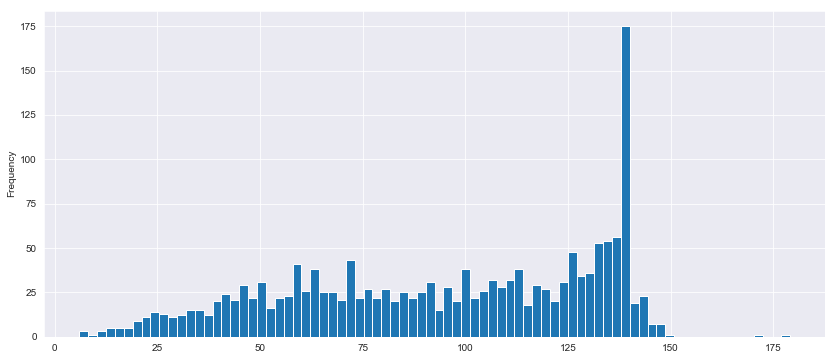

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,6))
sample_anger['length'].plot(bins=80, kind='hist') 

In [10]:
# get most common words in training dataset
all_words = []
for line in list(sample_anger['Tweet']):
    words = line.split()
    
for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

[('the', 3),
 ('with', 2),
 ('@mariankeyes', 1),
 ('pout', 1),
 ('tips', 1),
 ('me', 1),
 ('over', 1),
 ('edge.', 1),
 ('i', 1),
 ('am', 1)]

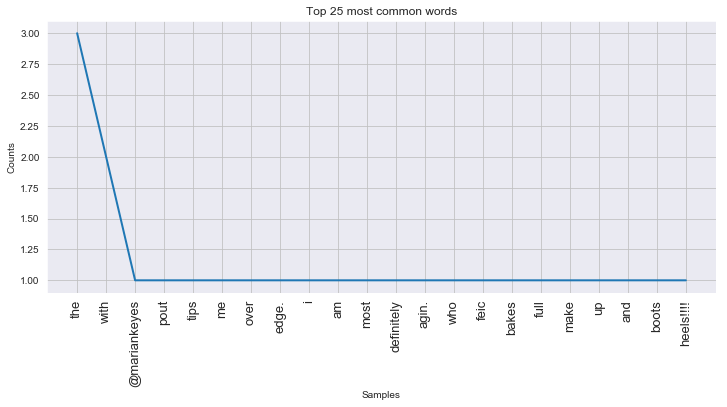

Text(0.5, 1.0, 'log-log plot of words frequency')

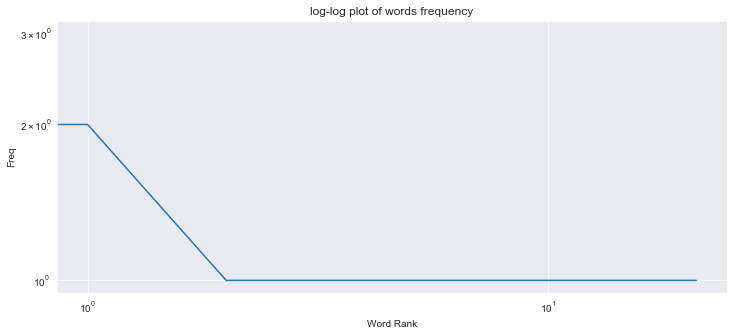

In [11]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [12]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove chines words
    tweet = re.sub(r'˜¥\w*','', tweet)
    tweet = re.sub(r'˜€\w*','', tweet)
    tweet = re.sub(r'˜¤\w*','', tweet)
    tweet = re.sub(r'˜ªðÿ\w*','', tweet)
    tweet = re.sub(r'ðÿ™\w*','', tweet)
    tweet = re.sub(r'\\\w*','', tweet)
    tweet = re.sub(r'±\w*','', tweet)
    tweet = re.sub(r'\w*','', tweet)
    tweet = re.sub(r'™„˜­\w*','', tweet)
    tweet = re.sub(r'ðÿ§€\w*','', tweet)
    tweet = re.sub(r'‘šðÿ¼\w*','', tweet)
    tweet = re.sub(r'ðÿ•\w*','', tweet)
    tweet = re.sub(r'€¢\w*','', tweet)
    tweet = re.sub(r'ã©\w*','', tweet)
    
    tweet = re.sub(r'\w*','',tweet)
    
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet
# ______________________________________________________________

# clean dataframe's text column
sample_anger['Tweet'] = sample_anger['Tweet'].apply(processTweet)
# preview some cleaned tweets
sample_anger['Tweet'].head(1000)

0                                shut hashtags are cool 
1      makes fucking irate jesus nobody calling ppl w...
2               lol adam the bull with his fake outrage 
3      passed away early this morning fast and furiou...
4      lol wow was gonna say really haha have you see...
5        need  dateðÿ™  olive guarded date and  dateðÿ• 
6      and republicans you namely graham flake sasse ...
7      rabid dog pulled out the backs cupboards looki...
8      very telling that racist bigots always resort ...
9                                 follow follow through 
10                              dude the new madden haha
11     can come mum 60th after 25k tweets then why sh...
12               lol little things like that make angry 
13                       one more day tiff one more day 
14     being dean really saving lot ppl don snap nomo...
15     who knew softballs could sting bad jimmy fallo...
16     women don like girls because resent them for l...
17     where your outrage that 

In [13]:
# drop duplicates
sample_anger= sample_anger.drop_duplicates('Tweet')
sample_anger.shape

(1400, 7)

In [14]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [15]:
# show stop words examples
stop_words = stopwords.words('english') # Show some stop words
' , '.join(stop_words)[:200], len(stop_words)

("i , me , my , myself , we , our , ours , ourselves , you , you're , you've , you'll , you'd , your , yours , yourself , yourselves , he , him , his , himself , she , she's , her , hers , herself , it ",
 179)

In [16]:
sample_anger["Tweet"].head(1000)

0                                 shut hashtags are cool 
1       makes fucking irate jesus nobody calling ppl w...
2                lol adam the bull with his fake outrage 
3       passed away early this morning fast and furiou...
4       lol wow was gonna say really haha have you see...
5         need  dateðÿ™  olive guarded date and  dateðÿ• 
6       and republicans you namely graham flake sasse ...
7       rabid dog pulled out the backs cupboards looki...
8       very telling that racist bigots always resort ...
9                                  follow follow through 
10                               dude the new madden haha
11      can come mum 60th after 25k tweets then why sh...
12                lol little things like that make angry 
13                        one more day tiff one more day 
14      being dean really saving lot ppl don snap nomo...
15      who knew softballs could sting bad jimmy fallo...
16      women don like girls because resent them for l...
17      where 

In [17]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]




# -------------------------------------------

# tokenize message column and create a column for tokens
sample_anger = sample_anger.copy()
sample_anger['tokens'] = sample_anger['Tweet'].apply(text_process) # tokenize style


sample_anger.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name,length,tokens
0,2017-En-10264,shut hashtags are cool,anger,2: moderate amount of anger can be inferred,2,moderate amount of anger can be inferred,59,"[shut, hashtags, cool]"
1,2017-En-10072,makes fucking irate jesus nobody calling ppl w...,anger,3: high amount of anger can be inferred,3,high amount of anger can be inferred,109,"[makes, fucking, irate, jesus, nobody, calling..."
2,2017-En-11383,lol adam the bull with his fake outrage,anger,1: low amount of anger can be inferred,1,low amount of anger can be inferred,42,"[lol, adam, bull, fake, outrage]"
3,2017-En-11102,passed away early this morning fast and furiou...,anger,0: no anger can be inferred,0,no anger can be inferred,140,"[passed, away, early, morning, fast, furious, ..."
4,2017-En-11506,lol wow was gonna say really haha have you see...,anger,1: low amount of anger can be inferred,1,low amount of anger can be inferred,116,"[lol, wow, gonna, say, really, haha, seen, chr..."


In [18]:
from wordcloud import WordCloud

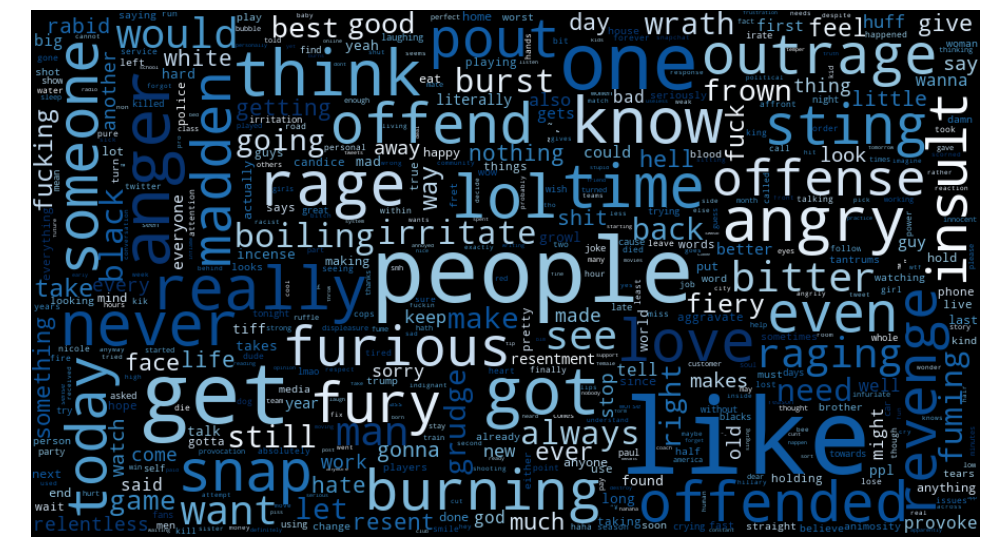

In [19]:
# split sentences to get individual words
all_words = []
for line in sample_anger['tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
# vectorize
bow_transformer = CountVectorizer(analyzer=text_process).fit(sample_anger['Tweet'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
# output
6865
# example of vectorized text
sample_tweet = sample_anger['Tweet'][111]
print(sample_tweet)
print('\n')
# vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
print('\n')



4225
indian uber driver just called someone the word wasn moving vehicle have jumped out 


  (0, 558)	1
  (0, 1100)	1
  (0, 1841)	1
  (0, 1974)	1
  (0, 2382)	1
  (0, 3313)	1
  (0, 3761)	1
  (0, 3837)	1
  (0, 4021)	1




In [22]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(sample_anger['Tweet'])
# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)


Shape of Sparse Matrix:  (1400, 4225)
Amount of Non-Zero occurences:  10227


In [24]:
# from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)


  (0, 4021)	0.3013503863877144
  (0, 3837)	0.38296863675473936
  (0, 3761)	0.3478175696106966
  (0, 3313)	0.23928995597316882
  (0, 2382)	0.33650145353175714
  (0, 1974)	0.3478175696106966
  (0, 1841)	0.3478175696106966
  (0, 1100)	0.3624065806151428
  (0, 558)	0.3126665024666538


In [25]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)



(1400, 4225)


In [26]:
# Run Train Data Through Pipeline analyzer=text_process
# uncomment below to train on a larger dataset but it is very slow for a regular laptop

# X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(sample_anger['Tweet'], sample_anger['Intensity_class'], test_size=0.3, random_state = 42)


# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }

# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)

# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Model: 0.367347 using {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.358163 Stdev:(0.051404) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.367347 Stdev:(0.066949) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.356122 Stdev:(0.041851) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.362245 Stdev:(0.066297) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.357143 Stdev:(0.059525) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.362245 Stdev:(0.058821) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.356122 Stdev:(0.044681) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.367347 Stdev:(0.061003) with: {'bow__ngram_range'

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.6s finished
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
from sklearn.externals import joblib

In [28]:
# save best model to current working directory
joblib.dump(grid, "twitter_sentiment.pkl")

['twitter_sentiment.pkl']

In [29]:
# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("twitter_sentiment.pkl" )

# get predictions from best model above
y_preds = model_NB.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.3952380952380952


confusion matrix: 
 [[50 15 34 10]
 [31 17 24 13]
 [27 18 58 29]
 [ 9  8 36 41]]


              precision    recall  f1-score   support

           0       0.43      0.46      0.44       109
           1       0.29      0.20      0.24        85
           2       0.38      0.44      0.41       132
           3       0.44      0.44      0.44        94

   micro avg       0.40      0.40      0.40       420
   macro avg       0.39      0.38      0.38       420
weighted avg       0.39      0.40      0.39       420

